In [47]:
from sklearn import tree
from dtreeviz.trees import *
from sklearn.datasets import load_boston

boston = load_boston()

X_train = boston.data
y_train = boston.target
testX = X_train[5,:]

regr = tree.DecisionTreeRegressor(max_depth=3)
regr = regr.fit(X_train, y_train)

viz = dtreeviz(regr, X_train, y_train, target_name='price',
               feature_names=boston.feature_names,
               X = testX)
viz

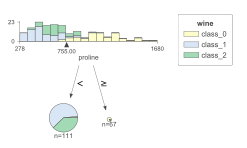

In [48]:
from sklearn.datasets import load_wine

clf = tree.DecisionTreeClassifier(max_depth=1)
wine = load_wine()

clf.fit(wine.data, wine.target)

testX = wine.data[np.random.randint(0, len(wine.data)),:]
testX=None

viz = dtreeviz(clf, wine.data, wine.target, target_name='wine',
              feature_names=wine.feature_names,
              class_names=list(wine.target_names),
              X=testX)
viz

# Single-var regression

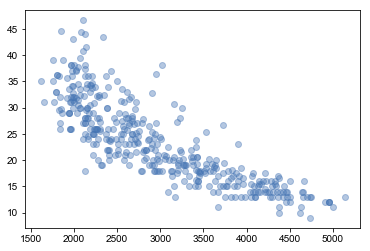

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_cars = pd.read_csv("data/cars.csv")
X = df_cars[['WGT']]
y = df_cars['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

from matplotlib import rcParams

rcParams['font.family'] = 'Arial'
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4')

In [50]:
# from dtreeviz.trees import rtreeviz
# rtreeviz(X_train, y_train, max_depth=2, feature_name='Vehicle Weight', target_name='MPG')

In [51]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.6810644016800156


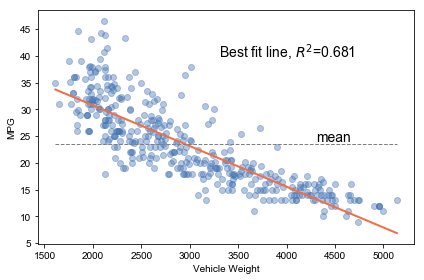

In [52]:
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4')
overall_feature_range = (np.min(X.values), np.max(X.values))
X_line = np.arange(overall_feature_range[0], overall_feature_range[1], 1).reshape(-1,1)
y_line = lm.predict(X_line)
plt.plot(X_line, y_line, color='#f46d43', lw=2)
plt.plot(overall_feature_range,[np.mean(y),np.mean(y)],'--', color='grey', linewidth=1)
plt.text(3300,40,f"Best fit line, $R^2$={lm.score(X_test,y_test):.3f}", fontsize=14)
plt.text(4300,24,"mean",fontsize=14)
plt.xlabel("Vehicle Weight")
plt.ylabel("MPG")
plt.tight_layout()
plt.savefig("/tmp/linear-model.svg", bbox_inches=0, pad_inches=0)

In [53]:
depth = 4
t = tree.DecisionTreeRegressor(max_depth=depth)
t.fit(X_train,y_train)
t.score(X_test,y_test)

0.6850106144009811

In [54]:
viz = dtreeviz(t, X, y, target_name='MPG', feature_names=['WGT'])
viz

In [55]:
y_range = (min(y), max(y)) # same y axis for all
overall_feature_range = (np.min(X.values), np.max(X.values))

shadow_tree = ShadowDecTree(t, X, y, feature_names=['WGT'])
splits = []
for node in shadow_tree.internal:
    splits.append( node.split() )
splits = sorted(splits)
bins = [overall_feature_range[0]] + splits + [overall_feature_range[1]]
bins

[1613,
 2080.0,
 2092.5,
 2109.0,
 2219.5,
 2371.0,
 2715.5,
 3009.0,
 3018.0,
 3412.5,
 3429.0,
 3454.0,
 3658.5,
 4002.0,
 4361.5,
 4848.5,
 5140]

In [56]:
wgt = X.WGT
means = []
for i in range(len(bins)-1):
    left = bins[i]
    right = bins[i+1]
    inrange = y[(wgt>=left) & (wgt<right)]
    
    means.append( np.mean(inrange) )
means

[33.059648859649116,
 44.299999,
 25.5,
 31.857142714285718,
 27.214285999999998,
 26.019999983333328,
 23.013953511627903,
 31.0,
 19.64761914285715,
 21.50000025,
 17.171428714285714,
 18.372222388888886,
 16.217241413793104,
 14.86060606060606,
 13.06,
 11.8]

In [57]:
y.values

array([18.      , 15.      , 18.      , 16.      , 17.      , 15.      ,
       14.      , 14.      , 14.      , 15.      , 15.      , 14.      ,
       15.      , 14.      , 24.      , 22.      , 18.      , 21.      ,
       27.      , 26.      , 25.      , 24.      , 25.      , 26.      ,
       21.      , 10.      , 10.      , 11.      ,  9.      , 27.      ,
       28.      , 25.      , 19.      , 16.      , 17.      , 19.      ,
       18.      , 14.      , 14.      , 14.      , 14.      , 12.      ,
       13.      , 13.      , 18.      , 22.      , 19.      , 18.      ,
       23.      , 28.      , 30.      , 30.      , 31.      , 35.      ,
       27.      , 26.      , 24.      , 25.      , 23.      , 20.      ,
       21.      , 13.      , 14.      , 15.      , 14.      , 17.      ,
       11.      , 13.      , 12.      , 13.      , 19.      , 15.      ,
       13.      , 13.      , 14.      , 18.      , 22.      , 21.      ,
       26.      , 22.      , 28.      , 23.      , 

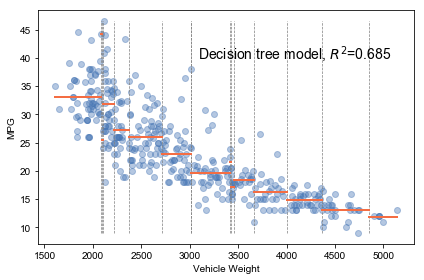

In [58]:
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4')

for split in splits:
    plt.plot([split,split],[*y_range],'--', color='grey', linewidth=.7)

prevX = overall_feature_range[0]
for i,m in enumerate(means):
    split = overall_feature_range[1]
    if i<len(splits):
        split = splits[i]        
    plt.plot([prevX,split],[m,m],'-', color='#f46d43', linewidth=2)
    prevX = split

plt.text(3090,40,f"Decision tree model, $R^2$={t.score(X_test,y_test):.3f}", fontsize=14)

plt.xlabel("Vehicle Weight")
plt.ylabel("MPG")
plt.tight_layout()
plt.savefig(f"/tmp/dectree-depth-{depth}.svg", bbox_inches=0, pad_inches=0)

# Try single-var classification

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

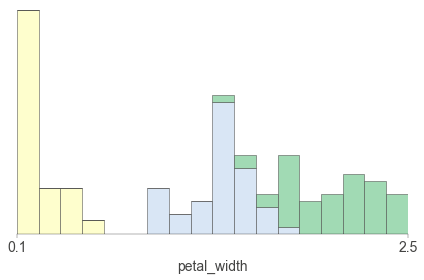

In [192]:
def ctreeviz(ax, x_train, y_train, max_depth, feature_name, class_names, fontsize = 14, gtype='bar'):
    if isinstance(x_train, pd.Series):
        x_train = x_train.values
    if isinstance(y_train,pd.Series):
        y_train = y_train.values

    ct = tree.DecisionTreeClassifier(max_depth=max_depth)
    ct.fit(x_train.reshape(-1,1), y_train)

    shadow_tree = ShadowDecTree(ct, x_train.reshape(-1,1), y_train,
                                feature_names=[feature_name], class_names=class_names)

    n_classes = shadow_tree.nclasses()
    nbins = get_num_bins('barstacked', n_classes)
    overall_feature_range = (np.min(x_train), np.max(x_train))

    ax.set_xlabel(f"{feature_name}", fontsize=fontsize, fontname="Arial",
                  color=GREY)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_linewidth(.3)
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(.3)

    class_values = shadow_tree.unique_target_values

    color_values = color_blind_friendly_colors[n_classes]
    colors = {v:color_values[i] for i,v in enumerate(class_values)}
    r = overall_feature_range[1]-overall_feature_range[0]

    X_hist = [x_train[y_train == cl] for cl in class_values]
    X_colors = [colors[cl] for cl in class_values]
    binwidth = r / nbins

    if gtype=='bar':
        hist, bins, barcontainers = ax.hist(X_hist,
                                           color=X_colors,
                                            align='mid',
                                            histtype='barstacked',
                                            bins=np.arange(overall_feature_range[0],overall_feature_range[1] + binwidth, binwidth),
                                            label=class_names)

        for patch in barcontainers:
            for rect in patch.patches:
                rect.set_linewidth(.5)
                rect.set_edgecolor(GREY)
        ax.set_xlim(*overall_feature_range)
        ax.set_xticks(overall_feature_range)
        ax.set_yticks([0,max([max(h) for h in hist])])
        ax.tick_params(axis='both', which='major', width=.3, labelcolor=GREY, labelsize=fontsize)
    elif gtype=='strip':
        mu = .5
        sigma = .1
        for h in X_hist:
            y_noise = np.random.normal(mu, sigma, size=len(h))
            ax.scatter(h,y_noise, alpha=.5, marker='^', s=15)

        ax.set_ylim(0.1,3)

from sklearn.datasets import load_iris

iris = load_iris()
X_train = iris.data
y_train = iris.target
class_names = ["setosa", "versicolor", "virginica"]
petal_width = X_train[:,3]
petal_width

fig, ax = plt.subplots(1, 1)

ctreeviz(ax, petal_width, y_train, max_depth=2, feature_name = 'petal_width', class_names=["setosa", "versicolor", "virginica"])
plt.tight_layout()
plt.savefig(f"/tmp/classtree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)
plt.show()

In [118]:
X_hist

[array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
        0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
        0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2]),
 array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
        1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
        1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
        1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3]),
 array([2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1,
        2. , 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8,
        1.8, 1.8, 2.1, 1.6, 1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8,
        2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])]

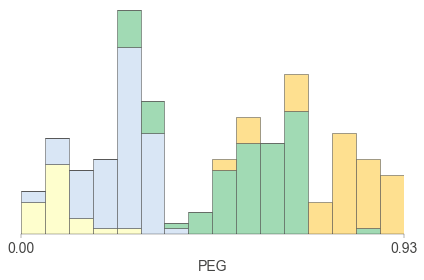

In [193]:
know = pd.read_csv("data/knowledge.csv")
class_names = ['very_low', 'Low', 'Middle', 'High']
know['UNS'] = know['UNS'].map({n: i for i, n in enumerate(class_names)})

x_train = know.PEG
y_train = know['UNS']
fig, ax = plt.subplots(1, 1)
ctreeviz(ax, x_train, y_train, max_depth=2, feature_name = 'PEG', class_names=class_names)
plt.tight_layout()
plt.savefig(f"/tmp/classtree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)
plt.show()